<a href="https://colab.research.google.com/github/Mercedeskoerner/EDA_Land_Temperature/blob/main/Global_Temp_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#to avoid using plt.show()
from plotly.subplots import make_subplots
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Freelance/GlobalTemperatures.csv")
df = df.dropna()
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 220.2+ KB


In [4]:
# Display descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,1992.0,8.571583,4.263193,0.404,4.43000,8.8505,12.85850,15.482
LandAverageTemperatureUncertainty,1992.0,0.276663,0.224030,0.034,0.09975,0.2300,0.34725,1.492
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [5]:
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Records: 1992
Columns: 9


In [6]:
# create a new column for date
df ['date'] = pd.to_datetime (df.dt)

In [7]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850-01-01
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850-02-01
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850-03-01
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850-04-01
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850-05-01


In [8]:
# create new columns for day, month and year
df_temp = df.copy() # create a new dataset
df_temp.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column
df_temp ['day'] = df_temp ['date'].dt.day
df_temp ['month'] = df_temp ['date'].dt.month
df_temp ['year'] = df_temp ['date'].dt.year
df_temp.head()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date,day,month,year
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850-01-01,1,1,1850
1201,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850-02-01,1,2,1850
1202,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850-03-01,1,3,1850
1203,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850-04-01,1,4,1850
1204,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850-05-01,1,5,1850


In [9]:
# Month distribution
df_temp['month'].value_counts()

,count
month,
1,166
2,166
3,166
4,166
5,166
6,166
7,166
8,166
9,166


In [10]:
# Year distribution
df_temp['year'].value_counts()

,count
year,
1850,12
1954,12
1956,12
1957,12
1958,12
...,...
1906,12
1907,12
1908,12


In [11]:
#lets work with data per year to understand behaviour
df_year_data = df_temp.groupby(['year'])[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()
# reser_index allow us to add year as a normal column in df. the output is correct with this index
df_year_data.head(10)

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
5,1855,8.110750,0.887167,13.493167,1.331417,1.702833,1.655333,15.021083,0.291167
6,1856,7.995917,0.760750,13.470250,1.798250,1.525083,1.778500,14.879333,0.260167
7,1857,7.758167,0.751083,13.437583,2.179167,1.856833,1.591167,14.758250,0.259750
8,1858,8.100250,0.699750,13.683000,1.870000,2.110750,1.224333,14.881500,0.251833
9,1859,8.252000,0.674667,13.860333,1.874750,2.460167,1.143000,14.929917,0.258250


In [12]:
# Simple Summary Statistics
df_year_data[['LandAverageTemperature', 'LandMaxTemperature',
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


In [13]:
df_year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       166 non-null    int32  
 1   LandAverageTemperature                     166 non-null    float64
 2   LandAverageTemperatureUncertainty          166 non-null    float64
 3   LandMaxTemperature                         166 non-null    float64
 4   LandMaxTemperatureUncertainty              166 non-null    float64
 5   LandMinTemperature                         166 non-null    float64
 6   LandMinTemperatureUncertainty              166 non-null    float64
 7   LandAndOceanAverageTemperature             166 non-null    float64
 8   LandAndOceanAverageTemperatureUncertainty  166 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 11.1 KB


In [16]:
#lets analizy LandAverageTemperature over the years
fig = go.Figure()
fig.update_layout (title = "Land Average Temperature between 1850 & 2015" ,
                    title_font_size = 20,
                    font = dict ( family = "Courier New, monospace", size= 12, color = "#7f7f7f"),
                    template = "ggplot2", hovermode = 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))


In [ ]:
#We can see from 1900 Land temperature average has increase.
#This could be because the Industrial Revolution and population increase. Lets continue analyzing:

In [17]:
#lets analyse LandAndOceanAverageTemperature over the years
fig = go.Figure()
fig.update_layout (title = "Land and Ocean Average Temperature between 1850 & 2015" ,
                    title_font_size = 20,
                    font = dict ( family = "Courier New, monospace", size= 12, color = "#7f7f7f"),
                    template = "ggplot2", hovermode = 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAndOceanAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

In [ ]:
#Same than landing acerage temperature, the ocean has increase the temperature since 1900 without any down

In [18]:


fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')


fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1980, 1980], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1980, 1980], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1980, 1980], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = df_year_data['year'], y = df_year_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1980, 1980], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

In [30]:
#BI VARIATE ANALYSIS
# Function to create scatter plot for bivariate analysis for LandAverageTemperature
import plotly.graph_objects as go
def plot_scatter_with_legend(column):
    plt.figure(figsize=(6, 4))
    sns.stripplot(x=column, y='year', data=df_year_data, jitter=True, hue=column, palette='Set1',legend=False )
    plt.title(f'{column} vs year')
    plt.legend(title=column, loc='lower right')

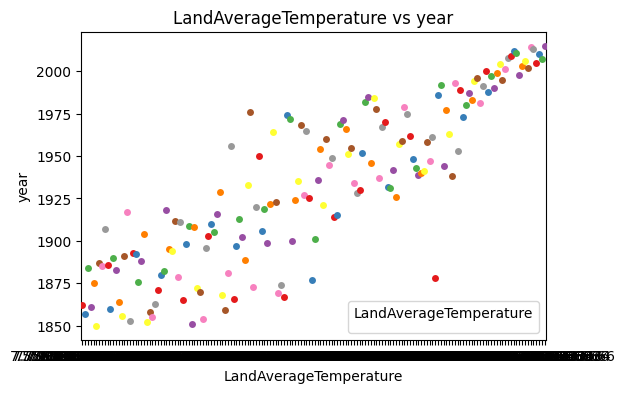

In [31]:
# Calling the function for LandAverageTemperature: We can see how in 1975 the Temperature started to consolidate in a increase tendency
plot_scatter_with_legend('LandAverageTemperature')

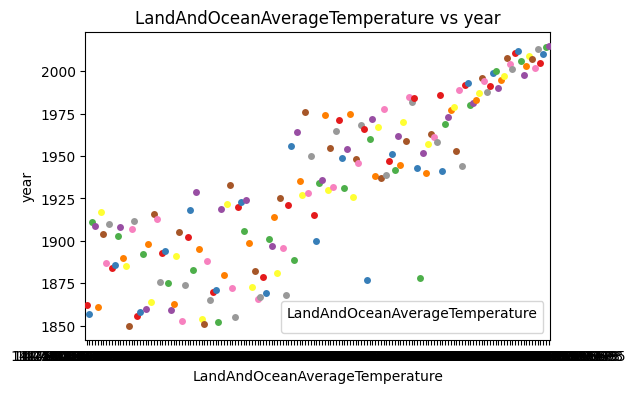

In [32]:
# Calling the function for LandAndOceanAverageTemperature: We can see how in 1975 the Temperature started to consolidate in a increase tendency
plot_scatter_with_legend('LandAndOceanAverageTemperature')

In [33]:
# 1: create a new column with data before and after 1975
df_year_data['turnpoint'] = np.where(df_year_data['year'] <= 1975, 'before', 'after')
df_year_data.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,turnpoint
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,before
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,before
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,before
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,before
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,before


In [34]:
# Compare average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = df_year_data['LandAverageTemperature'], y = df_year_data['turnpoint'],jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = df_year_data['LandMinTemperature'], y = df_year_data['turnpoint'],jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = df_year_data['LandMaxTemperature'], y = df_year_data['turnpoint'],jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = df_year_data['LandAndOceanAverageTemperature'], y = df_year_data['turnpoint'],jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

In [ ]:
df_year_data.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,turnpoint
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,before
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,before
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,before
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,before
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,before


In [35]:
df.drop(columns = ['dt'], axis = 1, inplace = True)

In [36]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850-01-01
1201,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850-02-01
1202,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850-03-01
1203,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850-04-01
1204,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850-05-01


Text(0.5, 1.0, 'Correlation Heatmap of Lifestyle Habits and Cancer Probability')

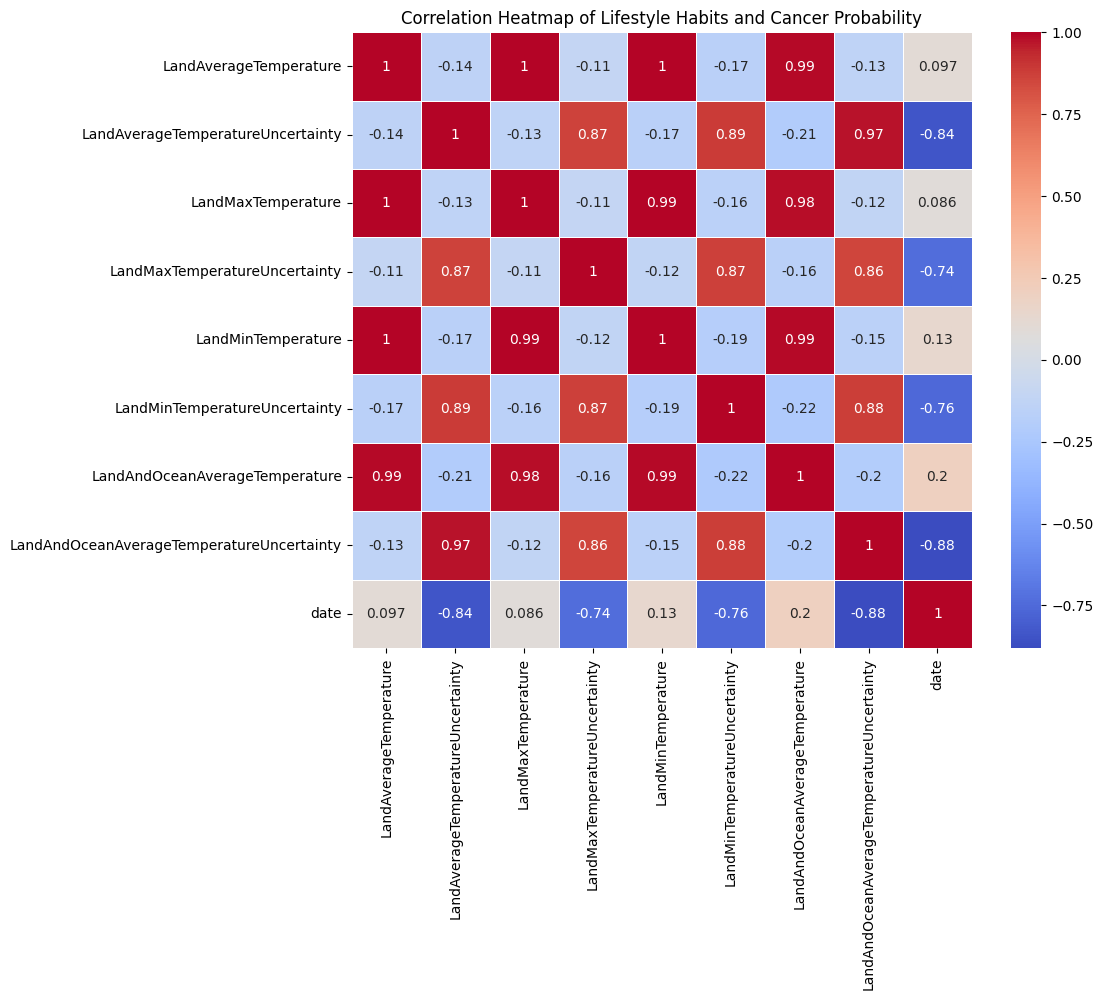

In [37]:
# Heatmap of correlations for multivariate analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Lifestyle Habits and Cancer Probability')